# Análise de Dados - Classificação de Grãos de Trigo com Aprendizado de Máquina
## Objetivo
Este projeto busca aplicar técnicas de aprendizado de máquina para classificar amostras de grãos de trigo em três variedades: **Kama**, **Rosa** e **Canadian**, utilizando o **Seeds Dataset**.  
As etapas incluem:  
- 1. Análise e pré-processamento dos dados
- 2. Implementação e comparação de diferentes algoritmos de classificação
- 3. Otimização dos modelos para melhor desempenho
- 4. Conclusão e insights extraidos  




## 1. ANÁLISE E PRÉ-PROCESSAMENTO DOS DADOS

## Instalação da biblioteca Scikit-learn

In [ ]:
!pip install scikit-learn

## Importação dos módulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

## Carregando os dados

In [ ]:
# Caminho do arquivo
file_path = '/content/seeds_dataset.txt'

# Carregando o arquivo no DataFrame
# Usando engine='python' para lidar com potenciais expressões regulares no delimitador
# e sep='\s+' para considerar um ou mais espaços em branco como delimitador
df = pd.read_csv(file_path, engine='python', sep='\s+', header=None)

# Exibindo as primeiras linhas para verificar
print(df.head())

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1


## Adicionando nomes as colunas

In [ ]:
# Adicionando nomes às colunas
df.columns = ['Área', 'Perímetro', 'Compacidade', 'Comprimento', 'Largura', 'Coeficiente', 'Sulco', 'Classe']

# Mostrando as primeiras linhas com nomes
print(df.head())


    Área  Perímetro  Compacidade  Comprimento  Largura  Coeficiente  Sulco  \
0  15.26      14.84       0.8710        5.763    3.312        2.221  5.220   
1  14.88      14.57       0.8811        5.554    3.333        1.018  4.956   
2  14.29      14.09       0.9050        5.291    3.337        2.699  4.825   
3  13.84      13.94       0.8955        5.324    3.379        2.259  4.805   
4  16.14      14.99       0.9034        5.658    3.562        1.355  5.175   

   Classe  
0       1  
1       1  
2       1  
3       1  
4       1  


## Identificando valores ausentes

In [ ]:
# Verifica se há valores ausentes
print(df.isnull().sum())

# Exibe as linhas com valores ausentes
print(df[df.isnull().any(axis=1)])

Área           0
Perímetro      0
Compacidade    0
Comprimento    0
Largura        0
Coeficiente    0
Sulco          0
Classe         0
dtype: int64
Empty DataFrame
Columns: [Área, Perímetro, Compacidade, Comprimento, Largura, Coeficiente, Sulco, Classe]
Index: []


## Calculando estastísticas descritivas

In [ ]:
# Estatísticas descritivas
print(df.describe())


             Área   Perímetro  Compacidade  Comprimento     Largura  \
count  210.000000  210.000000   210.000000   210.000000  210.000000   
mean    14.847524   14.559286     0.870999     5.628533    3.258605   
std      2.909699    1.305959     0.023629     0.443063    0.377714   
min     10.590000   12.410000     0.808100     4.899000    2.630000   
25%     12.270000   13.450000     0.856900     5.262250    2.944000   
50%     14.355000   14.320000     0.873450     5.523500    3.237000   
75%     17.305000   15.715000     0.887775     5.979750    3.561750   
max     21.180000   17.250000     0.918300     6.675000    4.033000   

       Coeficiente       Sulco      Classe  
count   210.000000  210.000000  210.000000  
mean      3.700201    5.408071    2.000000  
std       1.503557    0.491480    0.818448  
min       0.765100    4.519000    1.000000  
25%       2.561500    5.045000    1.000000  
50%       3.599000    5.223000    2.000000  
75%       4.768750    5.877000    3.000000  


## Visualizando as distribuições

## Histogramas

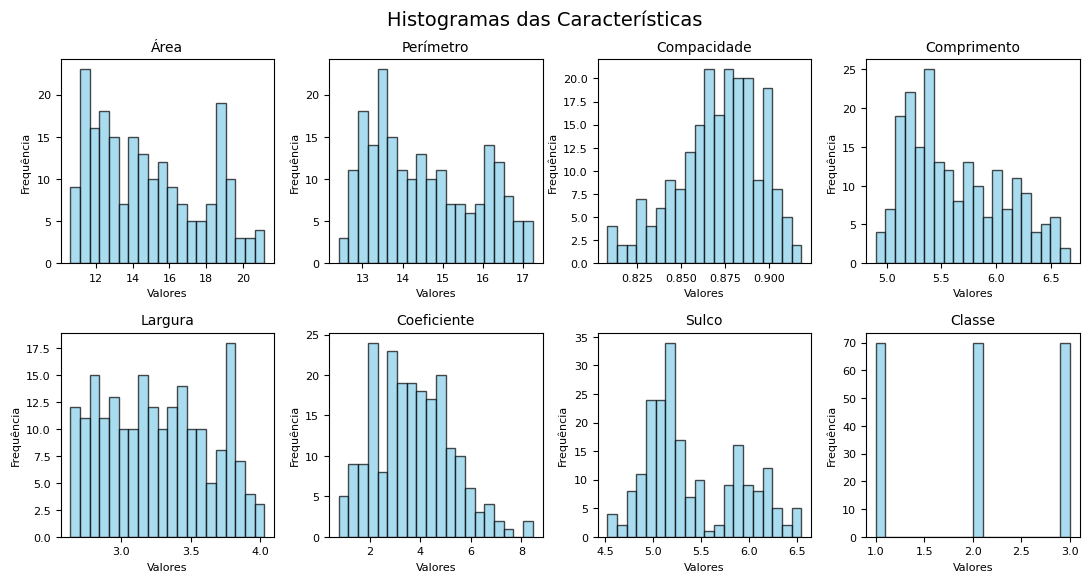

In [ ]:
# Configuração inicial
num_cols = len(df.columns)
fig, axes = plt.subplots(nrows=(num_cols // 4) + 1, ncols=4, figsize=(11, 8))
axes = axes.flatten()

# Gerar histogramas para cada coluna
for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('Valores', fontsize=8)
    axes[i].set_ylabel('Frequência', fontsize=8)
    axes[i].tick_params(axis='both', labelsize=8)

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar layout
plt.tight_layout()
plt.suptitle("Histogramas das Características", y=1.02, fontsize=14)
plt.show()

## Bloxplots

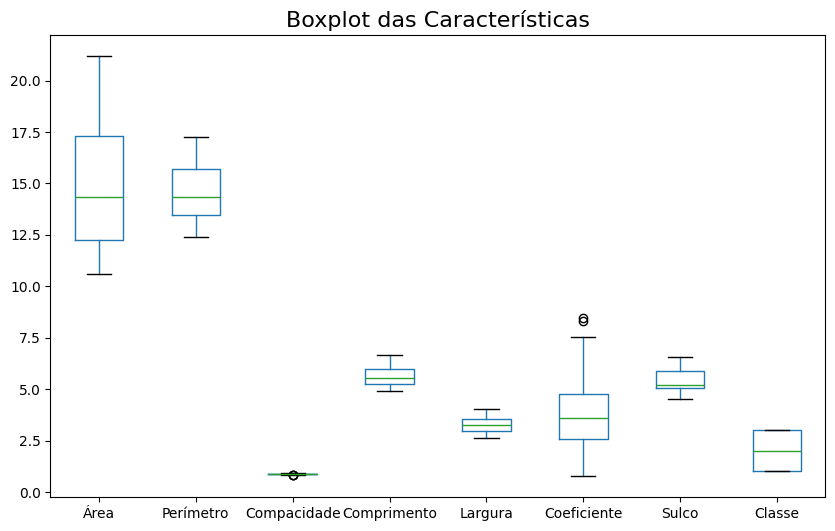

In [ ]:
# Criar boxplots
df.boxplot(figsize=(10, 6), grid=False)
plt.title("Boxplot das Características", fontsize=16)
plt.show()

## Dispersão

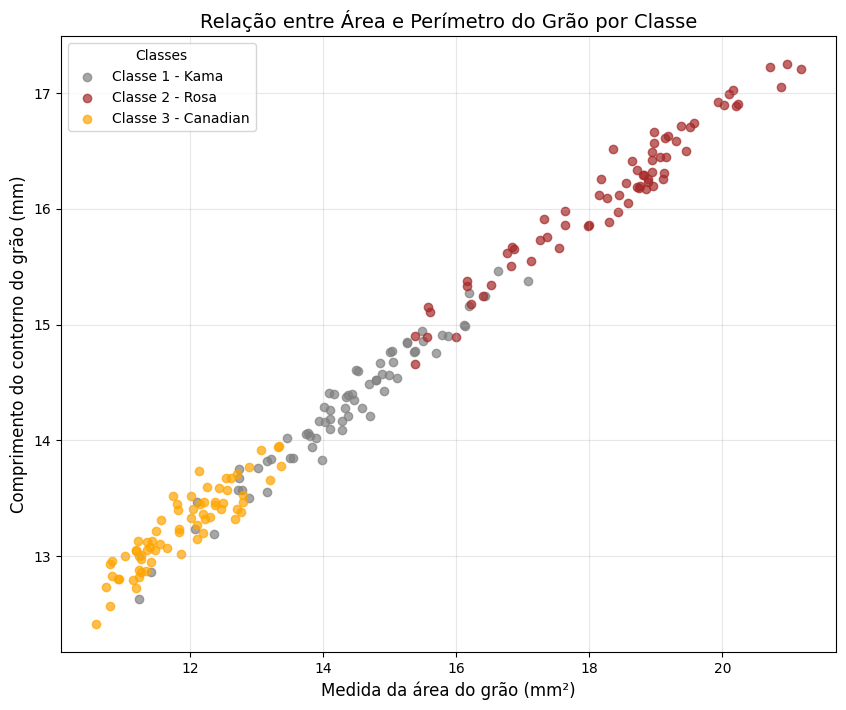

In [ ]:
import matplotlib.pyplot as plt

# Separando as classes
classes = df[df.columns[-1]].unique()

# Mapeamento das classes para nomes
classe_nomes = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}

plt.figure(figsize=(10, 8))
colors = ['gray', 'brown', 'orange']

for idx, classe in enumerate(classes):

    # Filtrar dados da classe
    data_classe = df[df[df.columns[-1]] == classe]

    # Scatter plot
    plt.scatter(
        data_classe[df.columns[0]],
        data_classe[df.columns[1]],
        label=f'Classe {classe} - {classe_nomes[classe]}',
        alpha=0.7,
        color=colors[idx]
    )

# Configurações do gráfico
plt.title('Relação entre Área e Perímetro do Grão por Classe', fontsize=14)
plt.xlabel('Medida da área do grão (mm²)', fontsize=12)
plt.ylabel('Comprimento do contorno do grão (mm)', fontsize=12)
plt.legend(title='Classes', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

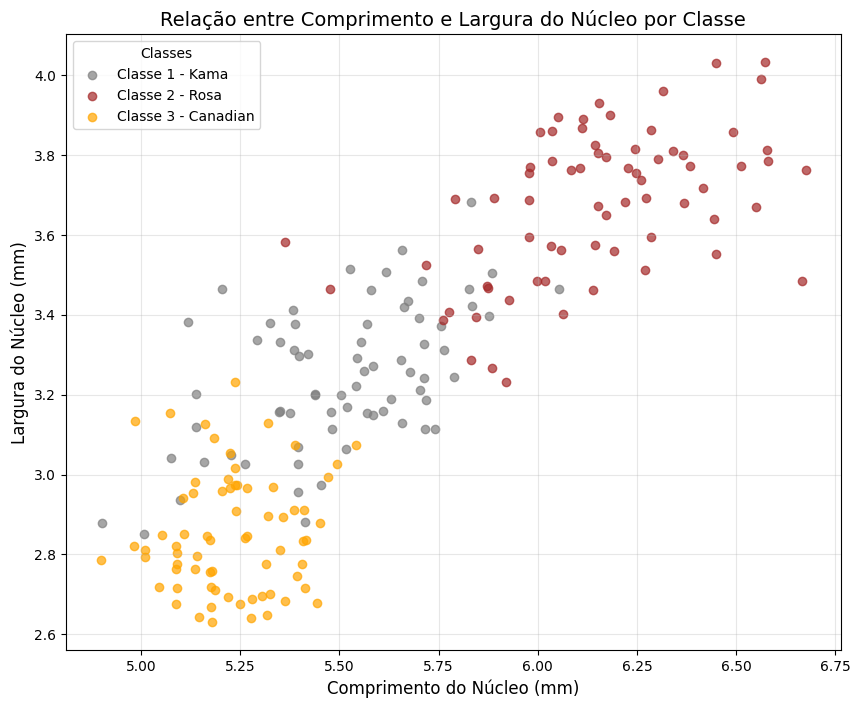

In [ ]:
# Separando as classes
classes = df[df.columns[-1]].unique()

# Mapeamento das classes para nomes
classe_nomes = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}

plt.figure(figsize=(10, 8))
colors = ['gray', 'brown', 'orange']

for idx, classe in enumerate(classes):

    # Filtrar dados da classe
    data_classe = df[df[df.columns[-1]] == classe]

    # Scatter plot
    plt.scatter(
        data_classe[df.columns[3]],
        data_classe[df.columns[4]],
        label=f'Classe {classe} - {classe_nomes[classe]}',
        alpha=0.7,
        color=colors[idx]
    )

# Configurações do gráfico
plt.title('Relação entre Comprimento e Largura do Núcleo por Classe', fontsize=14)
plt.xlabel('Comprimento do Núcleo (mm)', fontsize=12)
plt.ylabel('Largura do Núcleo (mm)', fontsize=12)
plt.legend(title='Classes', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

## Escaloneamento dos dados (Normalizando e padronizando)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalização
normalizer = MinMaxScaler()
data_normalized = normalizer.fit_transform(df.iloc[:, :-1])  # seleciona todas as colunas do DataFrame exceto a última (que é a coluna de classe)

# Padronização
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df.iloc[:, :-1])

# Adicionando a coluna de classe de volta
df_normalized = pd.DataFrame(data_normalized, columns=df.columns[:-1])
df_normalized['Classe'] = df['Classe']

df_standardized = pd.DataFrame(data_standardized, columns=df.columns[:-1])
df_standardized['Classe'] = df['Classe']

# Verificando os resultados
print("Dados Normalizados:")
print(df_normalized.head())
print("\nDados Padronizados:")
print(df_standardized.head())


Dados Normalizados:
       Área  Perímetro  Compacidade  Comprimento   Largura  Coeficiente  \
0  0.440982   0.502066     0.570780     0.486486  0.486101     0.189302   
1  0.405099   0.446281     0.662432     0.368806  0.501069     0.032883   
2  0.349386   0.347107     0.879310     0.220721  0.503920     0.251453   
3  0.306893   0.316116     0.793103     0.239302  0.533856     0.194243   
4  0.524079   0.533058     0.864791     0.427365  0.664291     0.076701   

      Sulco  Classe  
0  0.345150       1  
1  0.215165       1  
2  0.150665       1  
3  0.140817       1  
4  0.322994       1  

Dados Padronizados:
       Área  Perímetro  Compacidade  Comprimento   Largura  Coeficiente  \
0  0.142098   0.215462     0.000061     0.304218  0.141702    -0.986152   
1  0.011188   0.008224     0.428515    -0.168625  0.197432    -1.788166   
2 -0.192067  -0.360201     1.442383    -0.763637  0.208048    -0.667479   
3 -0.347091  -0.475333     1.039381    -0.688978  0.319508    -0.960818   
4

## Introdução
Nesta etapa inicial, foi realizada a análise exploratória e o pré-processamento dos dados, com o objetivo de compreender a estrutura do conjunto de dados e prepará-lo para os modelos de machine learning. As atividades incluíram carregamento e análise estatística, visualizações para identificar padrões e outliers, além da normalização dos dados.

---

## 1.1 Carregamento dos Dados
- Foi realizado o carregamento do conjunto de dados.
- Nomes descritivos foram atribuídos às colunas para melhor interpretação dos resultados.
- Não foram encontrados valores ausentes no dataset, o que indica que os dados estão completos.

---

## 1.2 Estatísticas Descritivas
As estatísticas descritivas foram calculadas para todas as colunas. Abaixo estão os principais insights:

- **Área** e **Perímetro**: Mostraram uma distribuição bem definida, com os valores variando entre os intervalos esperados.
- **Comprimento** e **Largura do Núcleo**: A média e os quartis sugerem uma relação proporcional entre o tamanho do núcleo e o tamanho do grão.

Tabela resumida das estatísticas descritivas:

| Coluna           | Média   | Desvio Padrão | Mínimo | Máximo |
|-------------------|---------|---------------|--------|--------|
| Área             | 14.85   | 2.91          | 10.59  | 21.18  |
| Perímetro        | 14.56   | 1.31          | 12.41  | 17.25  |
| Compacidade      | 0.87    | 0.02          | 0.81   | 0.92   |
| Comprimento      | 5.63    | 0.44          | 4.90   | 6.68   |
| Largura          | 3.26    | 0.38          | 2.63   | 4.03   |
| Coeficiente      | 3.70    | 1.50          | 0.77   | 8.46   |
| Sulco            | 5.41    | 0.49          | 4.52   | 6.55   |

---

## 1.3 Visualizações Gráficas

### Histogramas
- Foram utilizados histogramas para observar a distribuição de cada variável.

### Boxplots
- Boxplots foram usados para identificar outliers.
- Algumas classes possuem pontos fora da faixa interquartil, indicando grãos que estão fora do padrão esperado.

### Gráficos de Dispersão
- A análise da relação entre **Área** e **Perímetro** por classe mostrou que:  
  - A **Classe 2 (Rosa)** possui os maiores grãos.  
  - A **Classe 1 (Kama)** tem grãos de tamanho intermediário.  
  - A **Classe 3 (Canadian)** é composta pelos menores grãos.  
  - Apesar de as classes estarem relativamente bem distribuídas, há alguns **outliers**.

- A comparação entre **Comprimento** e **Largura do Núcleo** revelou que:  
  - Existe uma relação proporcional entre o tamanho do núcleo e o tamanho do grão.  
  - Não há casos de grãos pequenos com núcleos grandes ou vice-versa.  
  - A distribuição está mais dispersa em comparação ao gráfico de **Área x Perímetro**.

---

## 1.4 Escalonamento dos Dados
- Observou-se que as variáveis possuíam escalas diferentes, o que poderia impactar negativamente os modelos.
- Foi utilizado o escalonamento padronizado (média 0 e desvio padrão 1), garantindo que todas as variáveis estivessem na mesma escala.

---

### Observações Finais
- O **dataset** apresenta dados completos e uma correlação clara entre as variáveis. Os outliers identificados provavelmente não terão impacto significativo nos modelos mais robustos que serão utilizados.
- A etapa de escalonamento foi essencial devido à grande variação nas magnitudes dos dados.
- Com os dados prontos, as próximas etapas envolverão a aplicação de modelos de machine learning.


## 2. IMPLEMENTANTO E COMPARANDO DIFERENTES ALGORITMOS DE CLASSIFICAÇÃO

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Excluindo a coluna Classe do treinamento dos modelos
X = df.drop("Classe", axis=1)
y = df["Classe"]

# Dividindo o DataFrame em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializando dicionário para armazenar resultados
results = {}

# Função para exibir métricas de desempenho
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Adicionando cor à linha de destaque
    print(f"\033[1;33m=== Resultados para {model_name} ===\033[0m")
    print(f"Acurácia: {accuracy:.2f}")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    return accuracy

# Testando diferentes algoritmos de classificação

# Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
results["Random Forest"] = evaluate_model(model_rf, X_test, y_test, "Random Forest")

# SVM
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)
results["SVM"] = evaluate_model(model_svm, X_test, y_test, "SVM")

# KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
results["KNN"] = evaluate_model(model_knn, X_test, y_test, "KNN")

# Comparação dos modelos
print("\n\033[1;33m=== Comparação dos Modelos ===\033[0m")
for model, accuracy in results.items():
    print(f"{model}: Acurácia = {accuracy:.2f}")


=== Resultados para Random Forest ===
Acurácia: 0.89
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       1.00      0.95      0.98        21
           3       0.90      0.82      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 4  0 18]]
=== Resultados para SVM ===
Acurácia: 0.89
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        20
           2       1.00      0.86      0.92        21
           3       0.88      0.95      0.91        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63

Matriz de Confusão:
[[17  0  

### Análise

Todos os três algoritmos (Random Forest, SVM, KNN) apresentaram a mesma acurácia de 0.89, o que sugere que, para esse conjunto de dados, todos os modelos estão desempenhando de forma similar. No entanto, as matrizes de confusão e os relatórios de classificação mostram pequenas diferenças nas precisões, no recall e no F1-score para cada classe.


## 3. OTIMIZANDO OS MODELOS PARA MELHOR DESEMPENHO

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Excluindo a coluna Classe do treinamento dos modelos
X = df.drop("Classe", axis=1)
y = df["Classe"]

# Definindo os intervalos de hiperparâmetros
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Dividindo o DataFrame em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest - Grid Search
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# SVM - Grid Search
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# KNN - Grid Search
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Modelos treinados com os melhores hiperparâmetros encontrados pelo GridSearch
best_rf = grid_search_rf.best_estimator_
best_svm = grid_search_svm.best_estimator_
best_knn = grid_search_knn.best_estimator_

# Avaliando os modelos com o conjunto de teste
y_pred_rf = best_rf.predict(X_test)
y_pred_svm = best_svm.predict(X_test)
y_pred_knn = best_knn.predict(X_test)

## Exibindo as métricas após otimização dos modelos

In [ ]:
# Função para exibir métricas detalhadas por classe
def evaluate_model_by_class(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\033[1;33m=== Resultados para {model_name} ===\033[0m")
    print(f"Acurácia: {accuracy:.2f}")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Avaliação detalhada para Random Forest
evaluate_model_by_class(y_test, y_pred_rf, "Random Forest")

# Avaliação detalhada para SVM
evaluate_model_by_class(y_test, y_pred_svm, "SVM")

# Avaliação detalhada para KNN
evaluate_model_by_class(y_test, y_pred_knn, "KNN")



=== Resultados para Random Forest ===
Acurácia: 0.89
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       1.00      0.95      0.98        21
           3       0.90      0.82      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 4  0 18]]


=== Resultados para SVM ===
Acurácia: 0.90
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[17  0

## Análise de Desempenho após otimização


### Comparação de Desempenho:
- O modelo **SVM** obteve a maior acurácia (0.90), com a melhor distribuição de **precision**, **recall**, e **f1-score**, especialmente para as classes 2 e 3.
- O **Random Forest** obteve uma acurácia de 0.89, com um desempenho geral bom, mas um pouco abaixo do SVM em termos de balanceamento entre precisão e recall.
- O **KNN** teve um desempenho similar ao do **Random Forest**, mas com mais erros espalhados, especialmente na classe 1.

### Conclusões:
- **SVM** se destacou como o melhor modelo após a otimização, apresentando uma performance superior em termos de acurácia e equilíbrio entre precisão e recall.
- **Random Forest** e **KNN** mostraram resultados consistentes, com uma leve vantagem para o **SVM** em termos de geral e nas métricas principais.

### Melhorias Realizadas:
- Ajustes nos hiperparâmetros e treinamento mais focado resultaram em uma melhor distribuição de erros, especialmente entre as classes, com o **SVM** sendo o mais otimizado para a tarefa.


## 4. CONCLUSÃO E INSIGHTS EXTRAIDOS


Com base nos resultados obtidos, destacamos os principais pontos e implicações práticas para o setor de agronegócio, especialmente no gerenciamento e na classificação de grãos de trigo.

## Escolha do Modelo Mais Adequado
O **SVM** demonstrou ser o modelo mais eficiente, alcançando uma acurácia otimizada de **90%**. Além disso, apresentou um bom equilíbrio nas métricas de precision e recall, tornando-o uma escolha robusta para classificação precisa em cenários reais. Essa confiabilidade pode reduzir erros na categorização e melhorar os processos industriais.

## Impacto Prático
A aplicação de modelos de aprendizado de máquina no controle de qualidade agrega valor à cadeia produtiva. No caso da classificação de grãos, o uso do SVM pode:
- Aumentar a eficiência no controle de qualidade, evitando misturas inadequadas.
- Reduzir custos operacionais associados a triagens manuais.

Além disso, as características físicas dos grãos, como área e tamanho do núcleo, oferecem informações valiosas sobre os padrões entre as variedades. Por exemplo, a variedade **Rosa** apresentou grãos maiores, o que pode indicar um potencial diferenciado para certos mercados.

## Recomendações Futuras
Para ampliar os benefícios, algumas recomendações incluem:
- **Automatização do Processo:** Incorporar o modelo SVM a sistemas automatizados com sensores para classificação em tempo real.
- **Expansão dos Dados:** Adicionar novos dados sazonais ou ambientais ao modelo para uma melhoria contínua da precisão.
- **Análise de Outliers:** Investigar os grãos fora do padrão identificado pode ajudar a corrigir problemas de produção ou armazenamento.

Outra possibilidade é aplicar o mesmo framework em outras culturas agrícolas, ampliando sua utilidade para diferentes mercados do agronegócio.

## Considerações Finais
O uso de aprendizado de máquina para classificação de grãos demonstra grande potencial para transformar práticas agrícolas e industriais. Este projeto não apenas valida a eficiência técnica dos modelos aplicados, mas também sugere caminhos práticos para uma gestão mais eficiente, baseada em dados, machine learning e inteligência artificial no setor agroindustrial.
